In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style('darkgrid')
sns.set_context('talk')

In [5]:
df = pd.read_csv("./Files/cirurgias-em-ambulatorio.csv", delimiter=';')

In [6]:
df.head()

,Período,Região,Instituição,Localização Geográfica,Nº Episódios Cirúrgicos Ambulat com Procedimentos Ambulatorizáveis,Nº Episódios Cirúrgicos Ambulat e Intern com Proced Ambulatorizáveis,% Cir. Ambulatório (GDH) para Procedimentos Ambulatorizáveis
0,2013-01,Região de Saúde do Alentejo,"Hospital Espírito Santo de Évora, EPE","38.5684861,-7.9032848",209,268,78.0
1,2013-01,Região de Saúde do Centro,"Centro Hospitalar e Universitário de Coimbra, EPE","40.2191523,-8.4098211",577,746,77.3
2,2013-01,Região de Saúde do Centro,"Centro Hospitalar Tondela-Viseu, EPE","40.516364,-8.0827433",389,461,84.4
3,2013-01,Região de Saúde do Centro,"Instituto Português Oncologia de Coimbra, EPE","40.2162514,-8.4103814",5,31,16.1
4,2013-01,Região de Saúde do Centro,"Unidade Local de Saúde da Guarda, EPE","40.5309916,-7.2734793",109,146,74.7


In [18]:
df['Mes'] = pd.to_datetime(df['Período'], format='%Y-%m')

In [19]:
df.head()

,Período,Região,Instituição,Localização Geográfica,Nº Episódios Cirúrgicos Ambulat com Procedimentos Ambulatorizáveis,Nº Episódios Cirúrgicos Ambulat e Intern com Proced Ambulatorizáveis,% Cir. Ambulatório (GDH) para Procedimentos Ambulatorizáveis,data,Mes
0,2013-01,Região de Saúde do Alentejo,"Hospital Espírito Santo de Évora, EPE","38.5684861,-7.9032848",209,268,78.0,2013-01-01,2013-01-01
1,2013-01,Região de Saúde do Centro,"Centro Hospitalar e Universitário de Coimbra, EPE","40.2191523,-8.4098211",577,746,77.3,2013-01-01,2013-01-01
2,2013-01,Região de Saúde do Centro,"Centro Hospitalar Tondela-Viseu, EPE","40.516364,-8.0827433",389,461,84.4,2013-01-01,2013-01-01
3,2013-01,Região de Saúde do Centro,"Instituto Português Oncologia de Coimbra, EPE","40.2162514,-8.4103814",5,31,16.1,2013-01-01,2013-01-01
4,2013-01,Região de Saúde do Centro,"Unidade Local de Saúde da Guarda, EPE","40.5309916,-7.2734793",109,146,74.7,2013-01-01,2013-01-01


In [21]:
tot = df[['Mes', 'Nº Episódios Cirúrgicos Ambulat com Procedimentos Ambulatorizáveis', 'Nº Episódios Cirúrgicos Ambulat e Intern com Proced Ambulatorizáveis']].groupby(by='Mes').sum()

In [23]:
tot.head()

,Nº Episódios Cirúrgicos Ambulat com Procedimentos Ambulatorizáveis,Nº Episódios Cirúrgicos Ambulat e Intern com Proced Ambulatorizáveis
Mes,,
2013-01-01,9645,12586
2013-02-01,18561,24580
2013-03-01,27107,36290
2013-04-01,36368,48698
2013-05-01,46172,61819


In [24]:
tot['Ratio Cirurgias'] = tot['Nº Episódios Cirúrgicos Ambulat com Procedimentos Ambulatorizáveis']/tot['Nº Episódios Cirúrgicos Ambulat e Intern com Proced Ambulatorizáveis']

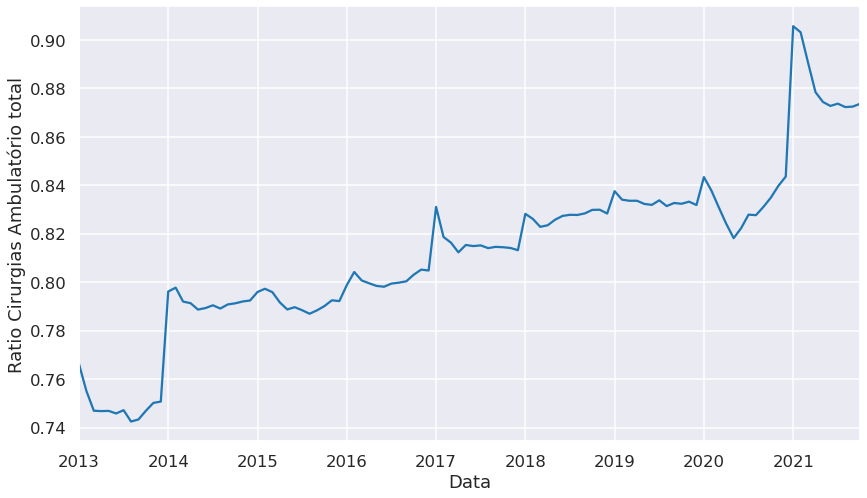

In [35]:
fig, ax = plt.subplots(figsize=(14,8))
tot['Ratio Cirurgias'].plot(ax=ax)
ax.set_ylabel("Ratio Cirurgias Ambulatório total")
ax.set_xlabel("Data")
plt.show()